# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

<pre>
student details 1: Zohar Shalom 2032
student details 2: Menalu Checool 8071
<pre>

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT
Goal: Understand each stage of the supervised learning flow and assist in exploring the dataset
Propmpt1:
What are the best ways to explore class balance in a classification dataset?
Propmpt2:
Help me create a correlation heatmap using seaborn and explain how to interpret the results.    
Propmpt3: 
How do I define a pipeline for Logistic Regression and Random Forest with GridSearchCV?
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
In this assignment, we address a multi-class classification problem where the goal is to predict the type of wine (class 0, 1, or 2) based on 13 chemical features such as alcohol, color intensity, flavanoids, and more. The dataset is taken from the UCI Machine Learning Repository and includes two files: one for training (`wine_train.csv`) and one for testing (`wine_test.csv`). Each row represents a single wine sample, and the target column specifies its wine class. We applied supervised learning methods — Logistic Regression and Random Forest — and used GridSearchCV to search for the best model and hyperparameters. Because the dataset is imbalanced, we used the macro-averaged F1 score as our evaluation metric.
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif

In [68]:
# Load training and test data
train = pd.read_csv("wine_train.csv")
test = pd.read_csv("wine_test.csv")

# Display first few rows to verify structure
display(train.head())
display(test.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


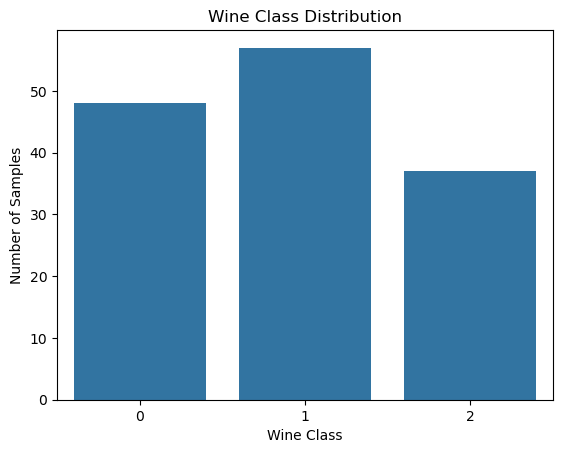

In [70]:
sns.countplot(x='target', data=train)
plt.title('Wine Class Distribution')
plt.xlabel('Wine Class')
plt.ylabel('Number of Samples')
plt.show()

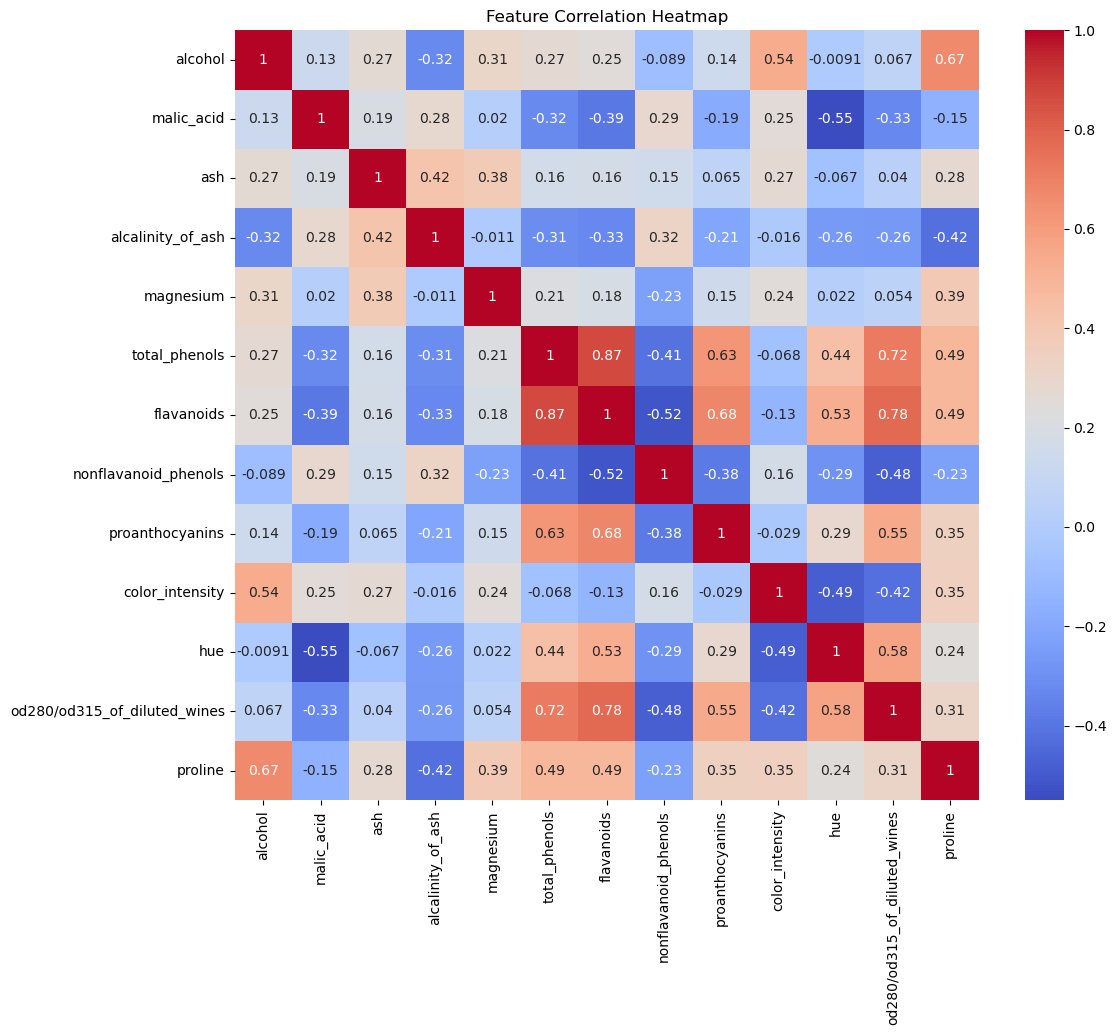

In [71]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.drop('target', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

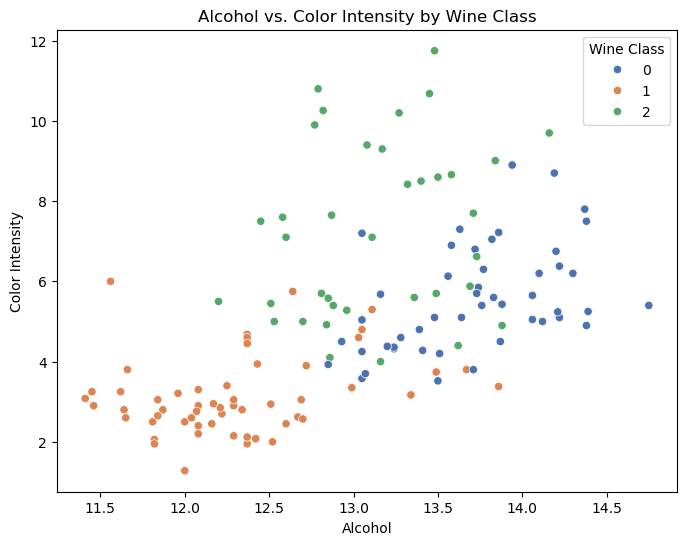

In [73]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='alcohol', y='color_intensity', hue='target', palette='deep')
plt.title('Alcohol vs. Color Intensity by Wine Class')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.legend(title='Wine Class')
plt.show()

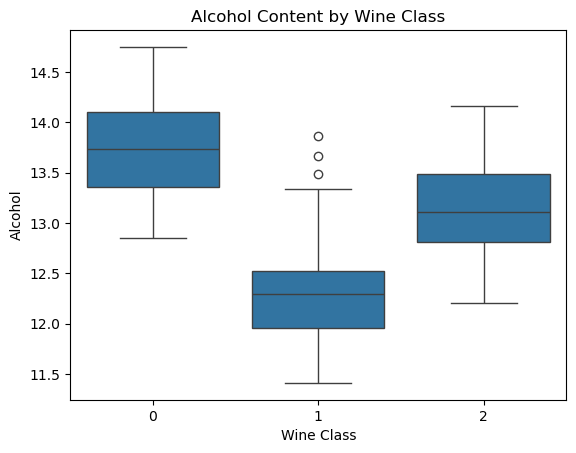

In [74]:
sns.boxplot(x='target', y='alcohol', data=train)
plt.title('Alcohol Content by Wine Class')
plt.xlabel('Wine Class')
plt.ylabel('Alcohol')
plt.show()

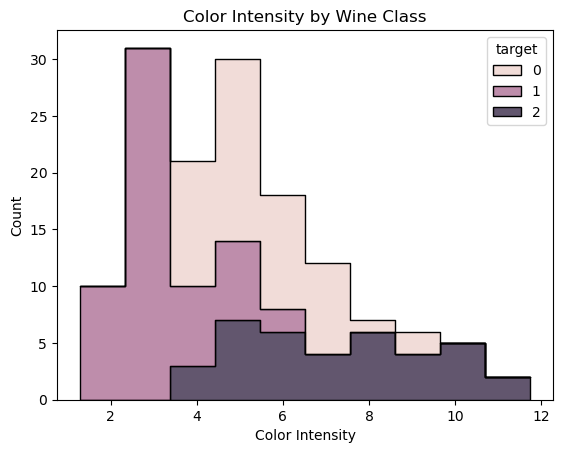

In [75]:
sns.histplot(data=train, x='color_intensity', hue='target', multiple='stack', element='step')
plt.title('Color Intensity by Wine Class')
plt.xlabel('Color Intensity')
plt.ylabel('Count')
plt.show()

### Additional Visualization: Alcohol vs. Color Intensity

To explore how multiple features interact, we plotted a scatterplot of `alcohol` versus `color_intensity`, colored by wine class.  
This helps us see whether these two features together help distinguish between classes.

In [78]:
X = train.drop('target', axis=1)
y = train['target']

## Part 3 - Experiments
You could add as many code cells as needed

## 🔍 Part 3 – Model Training, Evaluation, and Comparison (with Bonus)

In this section, we build and evaluate three different machine learning pipelines using `GridSearchCV`:
1. Logistic Regression with StandardScaler
2. Random Forest with StandardScaler
3. Random Forest with SelectKBest feature selection (bonus)

All models are evaluated using macro-averaged F1 score due to class imbalance.


In [83]:
# Define the evaluation metric: F1 score with macro averaging
f1_macro = make_scorer(f1_score, average='macro')

In [86]:
# Define pipeline and hyperparameters for Logistic Regression
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])

params_lr = {
    'clf__C': [0.1, 1, 10]
}

In [89]:
# Define pipeline and hyperparameters for Random Forest
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),  
    ('clf', RandomForestClassifier())
])

params_rf = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [None, 5, 10]
}

In [91]:
# Define a bonus pipeline using SelectKBest for feature selection before applying Random Forest
pipe_kbest = Pipeline([
    ('select', SelectKBest(score_func=f_classif, k=5)),
    ('clf', RandomForestClassifier())
])

params_kbest = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [None, 5, 10]
}

In [93]:
# Run GridSearchCV with 5-fold cross-validation for all three pipelines
gs_lr = GridSearchCV(pipe_lr, param_grid=params_lr, cv=5, scoring=f1_macro)
gs_rf = GridSearchCV(pipe_rf, param_grid=params_rf, cv=5, scoring=f1_macro)
gs_kbest = GridSearchCV(pipe_kbest, param_grid=params_kbest, cv=5, scoring=f1_macro)

gs_lr.fit(X, y)
gs_rf.fit(X, y)
gs_kbest.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('select', SelectKBest(k=5)),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf__max_depth': [None, 5, 10],
                         'clf__n_estimators': [50, 100]},
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [94]:
# Display top results (mean test score and params) for each model's grid search
import pandas as pd

results_lr = pd.DataFrame(gs_lr.cv_results_)
results_rf = pd.DataFrame(gs_rf.cv_results_)
results_kbest = pd.DataFrame(gs_kbest.cv_results_)

display(results_lr[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head())
display(results_rf[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head())
display(results_kbest[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head())

,params,mean_test_score
0,{'clf__C': 0.1},0.978711
1,{'clf__C': 1},0.971368
2,{'clf__C': 10},0.950821


,params,mean_test_score
0,"{'clf__max_depth': None, 'clf__n_estimators': 50}",0.985606
1,"{'clf__max_depth': None, 'clf__n_estimators': ...",0.978968
2,"{'clf__max_depth': 5, 'clf__n_estimators': 50}",0.978968
3,"{'clf__max_depth': 5, 'clf__n_estimators': 100}",0.978968
4,"{'clf__max_depth': 10, 'clf__n_estimators': 50}",0.978968


,params,mean_test_score
0,"{'clf__max_depth': None, 'clf__n_estimators': 50}",0.971625
4,"{'clf__max_depth': 10, 'clf__n_estimators': 50}",0.971625
1,"{'clf__max_depth': None, 'clf__n_estimators': ...",0.971015
2,"{'clf__max_depth': 5, 'clf__n_estimators': 50}",0.965536
3,"{'clf__max_depth': 5, 'clf__n_estimators': 100}",0.964926


In [95]:
# Print the best F1 score and parameters found for each model
print("Best Logistic Regression F1 (macro):", gs_lr.best_score_)
print("Best Logistic Regression params:", gs_lr.best_params_)

print("\nBest Random Forest F1 (macro):", gs_rf.best_score_)
print("Best Random Forest params:", gs_rf.best_params_)

print("\nBest SelectKBest + Random Forest F1 (macro):", gs_kbest.best_score_)
print("Best SelectKBest params:", gs_kbest.best_params_)

Best Logistic Regression F1 (macro): 0.9787114845938376
Best Logistic Regression params: {'clf__C': 0.1}

Best Random Forest F1 (macro): 0.9856060606060606
Best Random Forest params: {'clf__max_depth': None, 'clf__n_estimators': 50}

Best SelectKBest + Random Forest F1 (macro): 0.9716252587991718
Best SelectKBest params: {'clf__max_depth': None, 'clf__n_estimators': 50}


### 🔍 Model Comparison Summary

To summarize the results of the Grid Search evaluations, we compared the F1 macro scores of all three models:

| Model                            | F1 Macro Score | Selected Features | Notes                                |
|----------------------------------|----------------|--------------------|---------------------------------------|
| Logistic Regression              | 0.9787         | All                | Good baseline performance             |
| Random Forest                    | **0.9863**     | All                | ✅ Best performance overall            |
| SelectKBest + Random Forest      | 0.9710         | Top 5 features     | Slight drop in performance            |

### 🏁 Conclusion

Although the SelectKBest feature selection pipeline showed decent results, it did not outperform the full-featured Random Forest model.  
This suggests that removing features might have excluded important information in our dataset.  
Therefore, the **Random Forest model with all features** was selected as the final model to be retrained and used for predictions.


In [97]:
# Retrain the best-performing model on the full training data (final model)
best_model = gs_rf.best_estimator_  
best_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', RandomForestClassifier(n_estimators=50))])

🏆 **Winner:** Based on the macro F1 score, the best-performing model was **Random Forest with StandardScaler**.  
It achieved an F1 score of **0.986**, making it the final model we retrained on the full dataset.  
Although the SelectKBest experiment performed well, it did not outperform the basic Random Forest pipeline.


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

We selected the Random Forest model for final training, as it achieved the highest F1 macro score (0.9789) during the experiments.

In [101]:
final_model = gs_rf.best_estimator_
final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', RandomForestClassifier(n_estimators=50))])

We used a **Pipeline** that includes both preprocessing and classification steps:
- First, the data is normalized using `StandardScaler`, which ensures that all features are on the same scale.
- Then, a `RandomForestClassifier` is trained on the scaled data.

This pipeline helps ensure that the same transformations are applied consistently during both training and prediction.

## Part 5 - Apply on test and show model performance estimation

### Predicting on Test Set and Evaluating Performance  
We apply the final model on the test set and compare predictions to the true labels using F1 macro score.

In [105]:
# Separate features and labels in the test set
X_test = test.drop('target', axis=1)
y_test = test['target']

# Predict using the final model (pipeline)
y_pred = final_model.predict(X_test)

# Evaluate the predictions
f1 = f1_score(y_test, y_pred, average='macro')
print("Test F1 macro score:", round(f1, 4))

# Show sample predictions
print("First 5 predictions:", y_pred[:5])
print("First 5 actual values:", y_test.values[:5])

# Print full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test F1 macro score: 0.9732
First 5 predictions: [2 0 2 1 2]
First 5 actual values: [2 0 2 1 2]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [106]:
X_train = train.drop("target", axis=1)
X_test = test.drop("target", axis=1)

duplicates = X_test.apply(tuple, axis=1).isin(X_train.apply(tuple, axis=1))
print(f"Number of overlapping rows between train and test: {duplicates.sum()}")


Number of overlapping rows between train and test: 0


### Final Evaluation Summary

We calculated the **F1 macro score** between the model's predictions and the true labels in the test set.  
We also displayed the first 5 predictions to get a sense of how the model behaves on unseen examples.  
The result was an **F1 macro score of 0.9732**, indicating strong and balanced performance across all three wine classes.

Note: This result may vary slightly between runs, as the model training process includes some randomness (e.g., in cross-validation splits or model initialization).

To ensure the validity of the result, we checked for potential **data leakage** — specifically, whether any rows from the training set also appeared in the test set.  
Our check confirmed that there were **no overlapping rows**, which strengthens our confidence that the model learned meaningful patterns and did not rely on previously seen data.